In [1]:
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
import urllib.request
import urllib.parse
import pandas as pd
import requests


In [2]:
players = ['hide on bush', 'T1 Ellim', '칸 나', '롤오브레전드1234', 'T1 Gumayusi']
real_id = ['Faker', 'Ellim', 'Canna', 'Effort', 'Gumayusi']
dicts = []
for player in players:
    url = f'https://www.op.gg/summoner/userName={player}'
    header = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Trident/7.0; rv:11.0) like Gecko'}
    req = requests.get(url, headers = header)
    html = req.text
    soup = BeautifulSoup(html, 'html.parser')
    player_id = []
    results = []; play_times = []; game_types = []; champ_names = []; kills = []
    deaths = []; assists = []; kdas = []; levels = []; css = []; ck_rates = []; cs_per_mins = []; isWins = []
    board_list = soup.select('.GameItemWrap')
    for board in tqdm_notebook(board_list):
        for i in range(len(players)):
            if player == players[i]:
                player_id.append(real_id[i])
        result = board.select_one('.GameResult').string.strip()
        if result == 'Victory':
            isWin = 1
        else:
            isWin = 0
        play_time = board.select_one('.GameLength').string.strip()
        play_min = int(play_time.split()[0][:-1])
        cs = board.select_one('.CS').span.string.split()[0]
        cs_per_min = round(int(cs) / play_min, 2)
        game_type = board.select_one('.GameType').string.strip()
        champion = board.select_one('.ChampionName')
        champ_name = champion.a.string
        kill = int(board.select_one('.Kill').string.strip())
        death = int(board.select_one('.Death').string.strip())
        assist = int(board.select_one('.Assist').string.strip())
        if death != 0:
            kda = round((kill + assist) / death, 2)
        else:
            kda = kill + assist
        ck_rate = int(board.select_one('.CKRate').string.strip().split()[1][:-1])

        results.append(result); play_times.append(play_time); game_types.append(game_type); champ_names.append(champ_name)
        kills.append(kill); deaths.append(death); assists.append(assist); kdas.append(kda); css.append(cs);
        ck_rates.append(ck_rate); cs_per_mins.append(cs_per_min); isWins.append(isWin)

    mat_his = {
        'Player': player_id,
        'Result': results,
        'Game Length': play_times,
        'Game Type': game_types,
        'Champion': champ_names,
        'Kill': kills,
        'Death': deaths,
        'Assist': assists,
        'KDA': kdas,
        'CS': css,
        'CS/min': cs_per_mins,
        'CK Rate(%)': ck_rates,
        'isWin': isWins
    }
    dicts.append(mat_his)

In [3]:
dfs = []
for i in range(len(dicts)):
    df = pd.DataFrame(dicts[i])
    dfs.append(df)

In [4]:
Faker = dfs[0]; Ellim = dfs[1]; Canna = dfs[2]; Effort = dfs[3]; Gumayusi = dfs[4]
tmp = Faker.append(Ellim)
tmp = tmp.append(Canna)
tmp = tmp.append(Effort)
T1 = tmp.append(Gumayusi)

In [5]:
T1.to_csv('T1 Match History.csv', encoding='utf8')

In [6]:
T1

,Player,Result,Game Length,Game Type,Champion,Kill,Death,Assist,KDA,CS,CS/min,CK Rate(%),isWin
0,Faker,Victory,26m 56s,Ranked Solo,Thresh,3,5,17,4.00,32,1.23,71,1
1,Faker,Victory,21m 7s,Ranked Solo,Sylas,13,2,6,9.50,166,7.90,73,1
2,Faker,Defeat,28m 11s,Ranked Solo,Galio,5,11,7,1.09,161,5.75,50,0
3,Faker,Defeat,31m 26s,Ranked Solo,Azir,2,6,4,1.00,252,8.13,35,0
4,Faker,Victory,21m 19s,Ranked Solo,Sylas,9,3,6,5.00,177,8.43,63,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,Gumayusi,Defeat,27m 59s,Ranked Solo,Aatrox,4,11,2,0.55,157,5.81,38,0
16,Gumayusi,Victory,16m 9s,Ranked Solo,Lucian,2,3,6,2.67,136,8.50,47,1
17,Gumayusi,Victory,19m 43s,Ranked Solo,Senna,2,1,8,10.00,173,9.11,53,1
18,Gumayusi,Defeat,33m 52s,Ranked Solo,Kai'Sa,7,10,11,1.80,263,7.97,56,0


In [7]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [8]:
faker_tmp = T1.iloc[:20, 5:]
ellim_tmp = T1.iloc[20:40, 5:]
canna_tmp = T1.iloc[40:60, 5:]
effort_tmp = T1.iloc[60:80, 5:]
gumayusi_tmp = T1.iloc[80:, 5:]

faker_tmp['isWin'] = T1.iloc[:20, -1]
ellim_tmp['isWin'] = T1.iloc[20:40, -1]
canna_tmp['isWin'] = T1.iloc[40:60, -1]
effort_tmp['isWin'] = T1.iloc[60:80, -1]
gumayusi_tmp['isWin'] = T1.iloc[80:, -1]

In [11]:
players_tmp = []
players_tmp.append(faker_tmp); players_tmp.append(ellim_tmp); players_tmp.append(canna_tmp); players_tmp.append(effort_tmp)
players_tmp.append(gumayusi_tmp)
faker_tmp

,Kill,Death,Assist,KDA,CS,CS/min,CK Rate(%),isWin
0,3,5,17,4.00,32,1.23,71,1
1,13,2,6,9.50,166,7.90,73,1
2,5,11,7,1.09,161,5.75,50,0
3,2,6,4,1.00,252,8.13,35,0
4,9,3,6,5.00,177,8.43,63,1
5,6,9,3,1.00,171,6.58,33,0
6,3,1,5,8.00,143,8.94,36,1
7,6,0,3,9.00,146,9.12,50,1
8,6,5,14,4.00,176,6.77,56,1
9,1,3,21,7.33,18,0.95,61,1


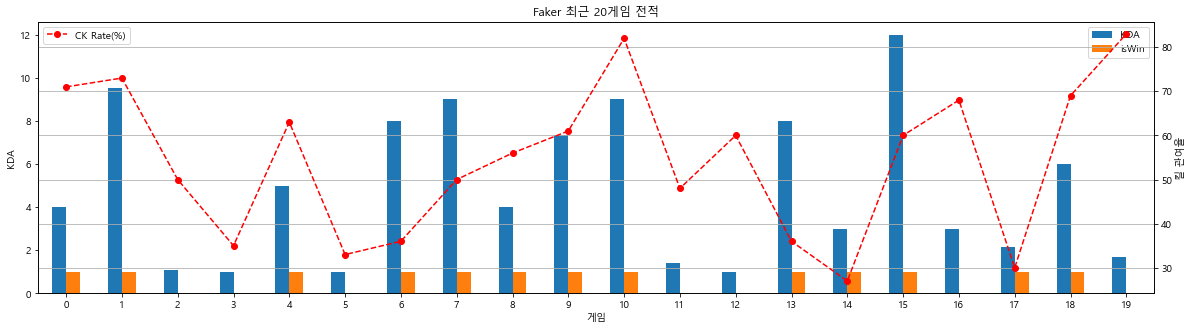

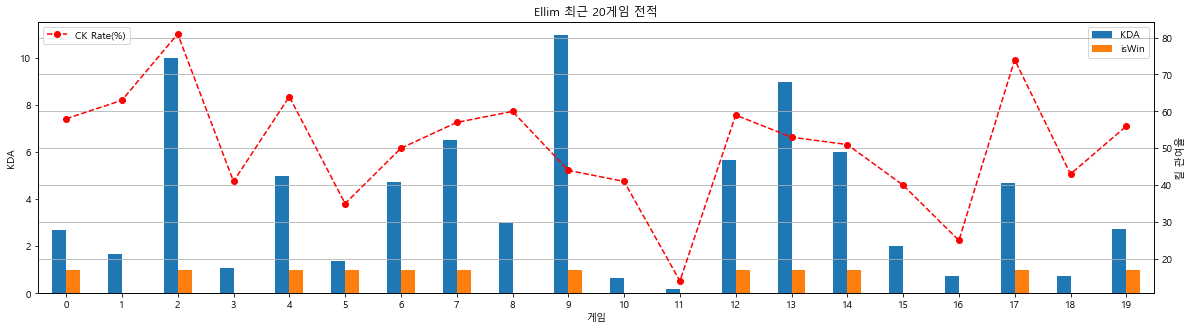

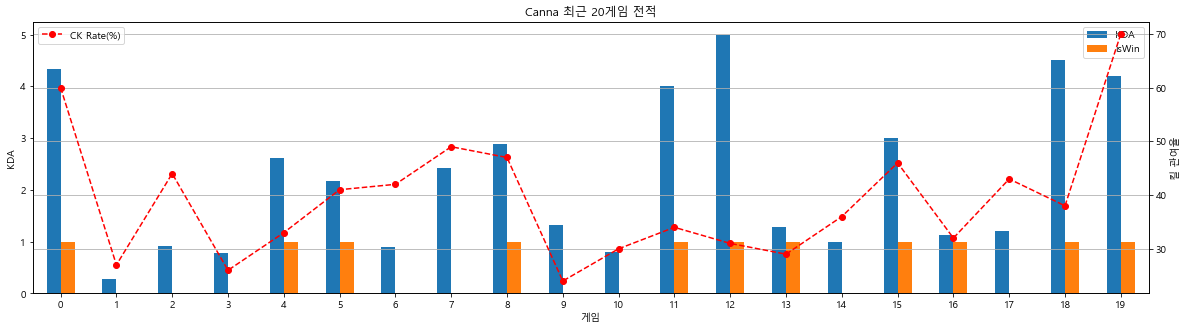

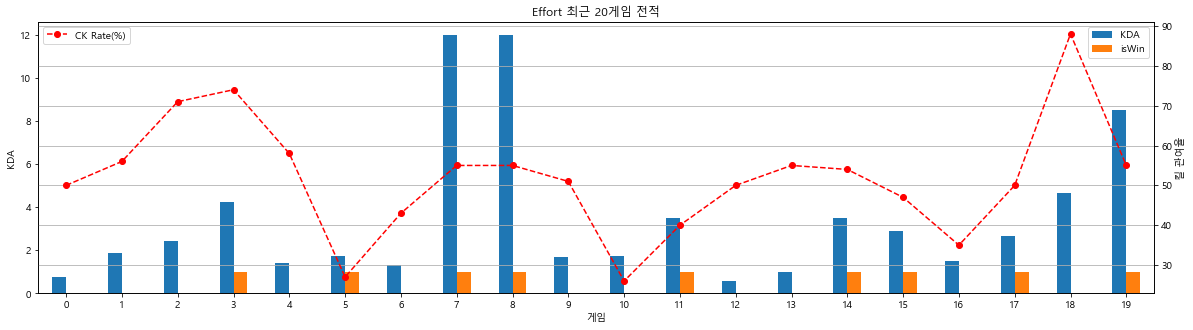

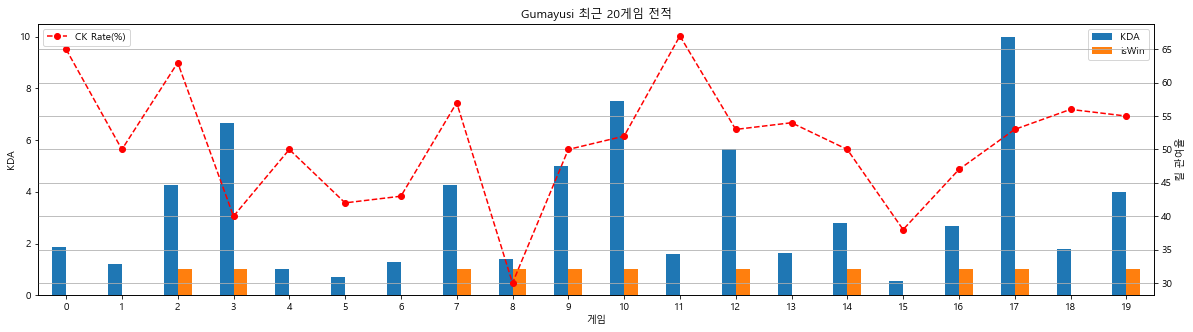

In [33]:
for i in range(len(players_tmp)):
    players_tmp[i][['KDA', 'isWin']].plot.bar(rot=0, figsize=(20, 5))
    plt.xlabel('게임')
    plt.ylabel('KDA')
    players_tmp[i]['CK Rate(%)'].plot(secondary_y=True, color='r', linestyle='--', marker='o')
    plt.grid(True, axis='y')
    plt.ylabel('킬 관여율')
    plt.title(f'{real_id[i]} 최근 20게임 전적')
    plt.legend(loc='upper left')
    plt.show()

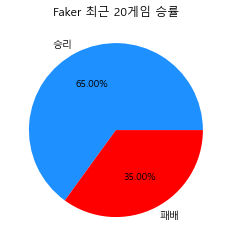

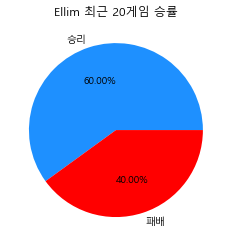

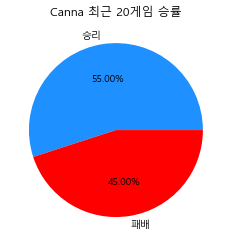

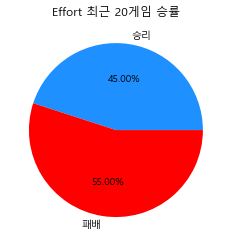

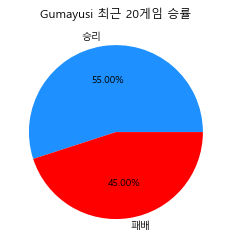

In [47]:
for i in range(len(players_tmp)):
    labels = ['승리', '패배']
    colors = ['dodgerblue', 'red']
    plt.pie([players_tmp[i]['isWin'].mean(), 1-(players_tmp[i]['isWin'].mean())], colors=colors, labels=labels, autopct='%.2f%%')
    plt.title(f'{real_id[i]} 최근 20게임 승률')
    plt.show()